# File and libraries

In [1]:
import pandas as pd
import numpy as np


filepath=r'dataset/df_ecom_2_6_bal_input'
test_filepath= f"{filepath}_test.csv"
train_filepath= f"{filepath}_train.csv"

file_tag = "Multicategory Store"

# DSLabs functions

In [2]:
%run "dslabs_functions.py"


dslabs_functions lodaded


# Data functions

In [3]:
%run "data_functions.py"


dslabs_functions lodaded
data_functions loaded


# Load

In [10]:

# test_data=True
test_data=False

# use to evaluate strategies. otherwise False to just transform data 
evaluate=True
# evaluate=False

if test_data==True:

    df=pd.read_csv(f"{filepath}.csv")
    
    test= pd.read_csv(test_filepath)
    train= pd.read_csv(train_filepath)

    # sample
    df = df.groupby('day_of_year').apply(lambda x: sample_per_day(x, 0.01)).reset_index(drop=True)
    test = test.groupby('day_of_year').apply(lambda x: sample_per_day(x, 0.01)).reset_index(drop=True)
    train = train.groupby('day_of_year').apply(lambda x: sample_per_day(x, 0.01)).reset_index(drop=True)

    # data=data.sample(frac=0.05, replace=False)
    # test=test.sample(frac=0.05, replace=False)
    # train=train.sample(frac=0.05, replace=False)
    
    
else:
    df=pd.read_csv(f"{filepath}.csv")  
    test= pd.read_csv(test_filepath)
    train= pd.read_csv(train_filepath)

    # larger sample 10%
    # data = data.groupby('day_of_year').apply(lambda x: sample_per_day(x, 0.1)).reset_index(drop=True)
    # test = test.groupby('day_of_year').apply(lambda x: sample_per_day(x, 0.1)).reset_index(drop=True)
    # train = train.groupby('day_of_year').apply(lambda x: sample_per_day(x, 0.1)).reset_index(drop=True)

 
target='is_purchase'
target_metric_2='precision'
target_metric='f2'
vars: list[str] = df.columns.to_list()
labels: list = list(df[target].unique())


# ensure sorting by day_of_year for correct splitting 
# "When in the presence of temporal data, data partition shall use older data to train and newer to test, in order to not use future data to classify past data. In any other case, partition shall be random."
df.sort_values(by='day', inplace=True)
test.sort_values(by='day', inplace=True)
train.sort_values(by='day', inplace=True)



df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188630 entries, 0 to 188629
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   category_code_lvl_1  188630 non-null  float64
 1   category_code_lvl_2  188630 non-null  float64
 2   price                188630 non-null  float64
 3   is_purchase          188630 non-null  int64  
 4   activity_in_session  188630 non-null  float64
 5   week_of_month        188630 non-null  int64  
 6   day                  188630 non-null  int64  
 7   brand_value          188630 non-null  float64
 8   product_category     188630 non-null  int64  
 9   time_of_day_sin      188630 non-null  float64
 10  time_of_day_cos      188630 non-null  float64
 11  day_of_week_sin      188630 non-null  float64
 12  day_of_week_cos      188630 non-null  float64
 13  hour_sin             188630 non-null  float64
 14  hour_cos             188630 non-null  float64
 15  min_sin              1

In [5]:
print(df.shape[0])
print(train.shape[0])
print(test.shape[0])

188630
230440
56589


# Distribution Check

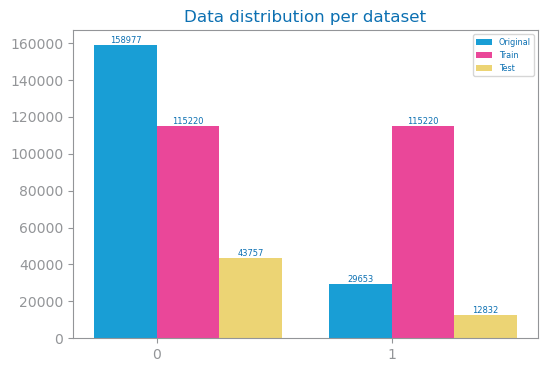

In [11]:
from pandas import concat
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_multibar_chart


# Distribution check


# Create a dictionary to store original class counts
values: dict[str, list[int]] = {
    "Original": [
        len(df[df[target] == 0]),  # Assuming 0 is the negative class
        len(df[df[target] == 1]),  # Assuming 1 is the positive class
    ]
}

values["Train"] = [
    len(train[train[target] == 0]),
    len(train[train[target] == 1]),
]
values["Test"] = [
    len(test[test[target] == 0]),
    len(test[test[target] == 1]),
]

# Visualize the distribution
figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")
show()

# Model Evaluation

In [12]:
if evaluate==True:

    trnX, tstX, trnY, tstY, labels, vars = read_train_test_from_files(train, test, target)
    print(f'Train#={len(trnX)} Test#={len(tstX)}')
    print(f'Labels={labels}')

Train#=230440 Test#=56589
Labels=[0, 1]


## recall evaluation

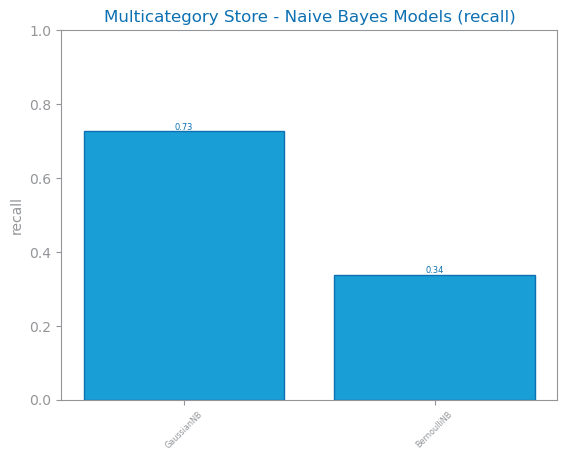

In [15]:
if evaluate==True:
    
    best_model_recall, recall_params = naive_Bayes_study(trnX, trnY, tstX, tstY, metric='recall',file_tag=file_tag)
    savefig(f'images/{file_tag}_dt_recall_study.png')
    show()

<Figure size 640x480 with 0 Axes>

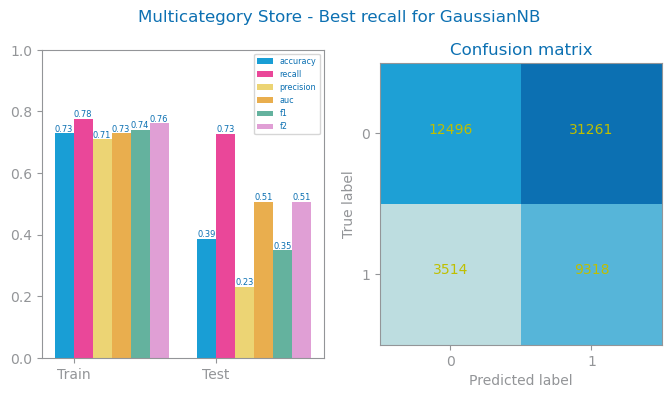

In [16]:
from dslabs_functions import plot_evaluation_results

prd_trn = best_model_recall.predict(trnX)
prd_tst = best_model_recall.predict(tstX)
figure()

plot_evaluation_results(recall_params, trnY, prd_trn, tstY, prd_tst, labels, file_tag=file_tag)
savefig(f'images/{file_tag}_dt_{recall_params["name"]}_best_{recall_params["metric"]}_eval.png')
show()

## evaluate precision

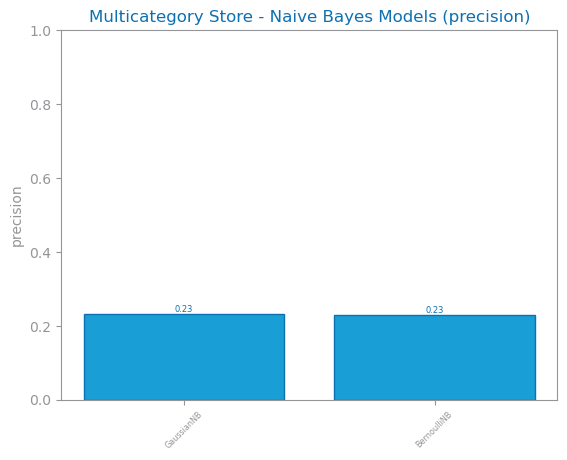

In [20]:
best_model_prec, prec_params = naive_Bayes_study(trnX, trnY, tstX, tstY, metric='precision',file_tag=file_tag)
savefig(f'images/{file_tag}_dt_precision_study.png')
show()

<Figure size 640x480 with 0 Axes>

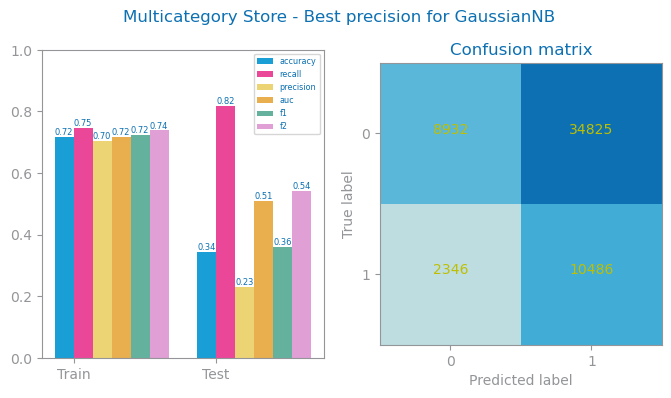

In [21]:
from dslabs_functions import plot_evaluation_results


prd_trn: array = best_model_prec.predict(trnX)
prd_tst: array = best_model_prec.predict(tstX)
figure()
plot_evaluation_results(prec_params, trnY, prd_trn, tstY, prd_tst, labels, file_tag=file_tag)
savefig(f'images/{file_tag}_dt_{prec_params["name"]}_best_{prec_params["metric"]}_eval.png')
show()

## evaluate accuracy

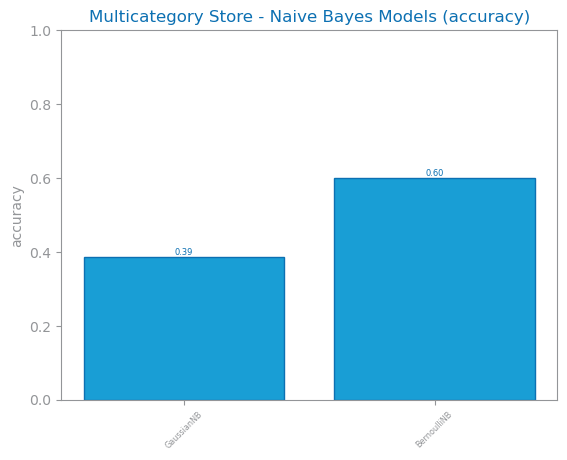

In [19]:
best_model_acc, acc_params = naive_Bayes_study(trnX, trnY, tstX, tstY, metric='accuracy',file_tag=file_tag)
savefig(f'images/{file_tag}_dt_accuracy_study.png')
show()

<Figure size 640x480 with 0 Axes>

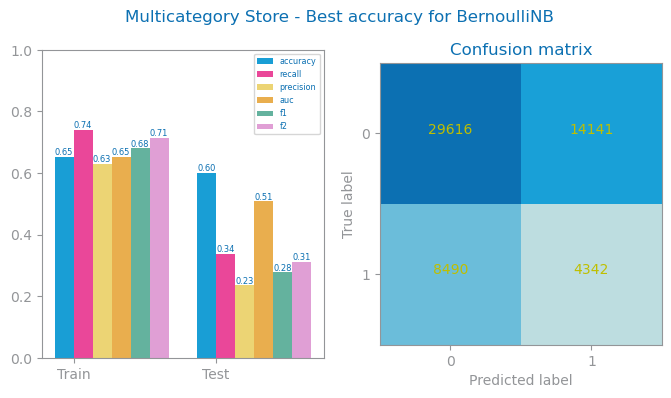

In [20]:
prd_trn: array = best_model_acc.predict(trnX)
prd_tst: array = best_model_acc.predict(tstX)
figure()
plot_evaluation_results(acc_params, trnY, prd_trn, tstY, prd_tst, labels,file_tag=file_tag)
savefig(f'images/{file_tag}_dt_{acc_params["name"]}_best_{acc_params["metric"]}_eval.png')
show()

## evaluate f2

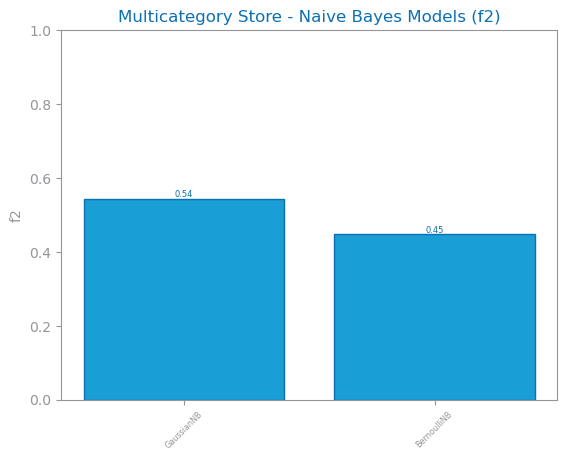

In [13]:
best_model_f2, f2_params = naive_Bayes_study(trnX, trnY, tstX, tstY, metric='f2',file_tag=file_tag)
savefig(f'images/{file_tag}_dt_accuracy_study.png')
show()

## Evaluate for best model - NB

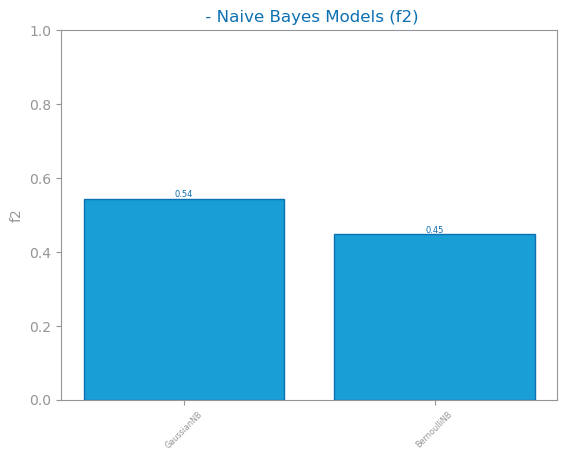

In [14]:
if evaluate==True:

    best_model, params = naive_Bayes_study(trnX, trnY, tstX, tstY, metric=target_metric)
    savefig(f'images/{file_tag}_dt_{target_metric}_study.png')
    show()

<Figure size 640x480 with 0 Axes>

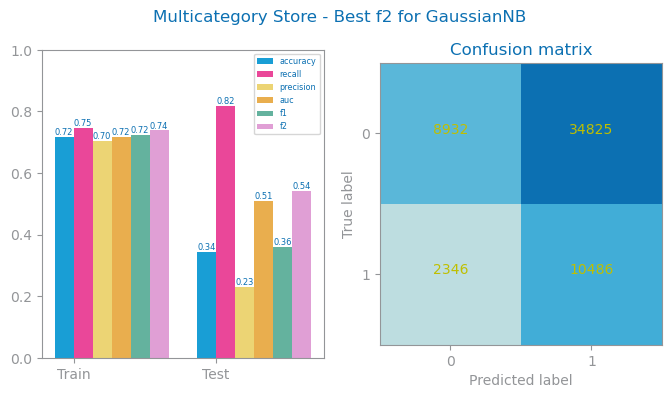

In [19]:
prd_trn: array = best_model.predict(trnX)
prd_tst: array = best_model.predict(tstX)
figure()
plot_evaluation_results(f2_params, trnY, prd_trn, tstY, prd_tst, labels,file_tag=file_tag)
savefig(f'images/{file_tag}_dt_{f2_params["name"]}_best_{f2_params["metric"]}_eval.png')
show()

# Overfitting

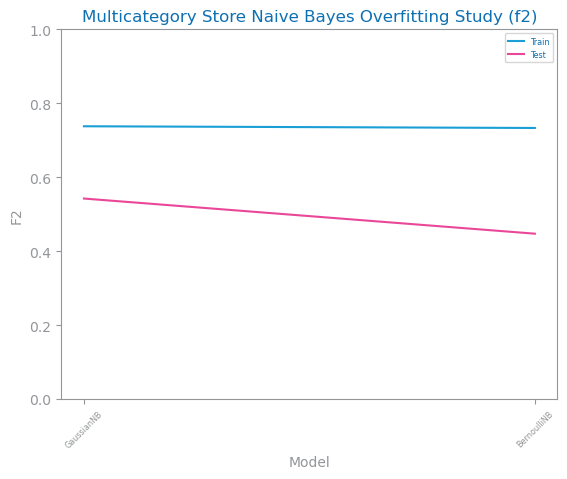

In [16]:
from matplotlib.pyplot import figure, savefig
from sklearn.naive_bayes import GaussianNB, BernoulliNB

# Define Naive Bayes models
nb_models = {
    "GaussianNB": GaussianNB(),
    "BernoulliNB": BernoulliNB(),
}

# Choose your metric name as a string
acc_metric = "f2"  # Or any other metric you want to use

y_tst_values = {}
y_trn_values = {}

# Iterate through each Naive Bayes model and evaluate performance on train and test sets
for name, model in nb_models.items():
    model.fit(trnX, trnY)
    
    # Predictions for train and test sets
    prd_trn_Y = model.predict(trnX)
    prd_tst_Y = model.predict(tstX)
    
    # Dynamically call the selected metric from CLASS_EVAL_METRICS by name
    trn_metric_value = CLASS_EVAL_METRICS[acc_metric](trnY, prd_trn_Y)
    tst_metric_value = CLASS_EVAL_METRICS[acc_metric](tstY, prd_tst_Y)
    
    # Store values for plotting
    y_trn_values[name] = trn_metric_value
    y_tst_values[name] = tst_metric_value

# Plotting overfitting study
figure()
plot_multiline_chart(
    list(nb_models.keys()),  # x-axis labels (model names)
    {"Train": list(y_trn_values.values()), "Test": list(y_tst_values.values())},
    title=f"{file_tag} Naive Bayes Overfitting Study ({acc_metric})",
    xlabel="Model",
    ylabel=acc_metric.capitalize(),  # Use the metric name as the label
    percentage=True,  # Set to False if your metric is not in percentage
)
savefig(f"images/{file_tag}_nb_overfitting_{acc_metric}.png")
show()


# Analysis

